# Explore statistics with Python

Into this notebook, we will explore statistics with Python. Into the first part we will investigate some simple statistics like mean, median, mode, variance, standard deviation, etc. And also we will see the normal distribution and how to generate random numbers with it.

In [1]:
# First import the libraries we need
import numpy as np                          # for numerical calculations
import pandas as pd                         # for data analysis
import matplotlib.pyplot as plt             # for plotting   
import seaborn as sns                       # for plotting
import scipy.stats as stats                 # for statistical calculations

## Descriptive statistics

The mean is the average of a set of numbers. The median is the middle number in a set of numbers. The mode is the number that appears most often in a set of numbers.


In [2]:
# Lets create a random dataset for our analysis

data = np.random.normal(0, 1, 1000)             # create a random normal distribution
data = pd.DataFrame(data, columns=['data'])     # convert to a dataframe
data.head()                                     # show the first 5 rows

,data
0,-1.304505
1,-1.505594
2,-1.734423
3,-0.416121
4,0.239116


In [3]:
# Pandas give us the ability to see the statistical summary of our data.

data.describe()

,data
count,1000.000000
mean,0.004433
std,1.004738
min,-3.275271
25%,-0.629590
50%,0.026972
75%,0.700529
max,3.245351


As easy as that we calculated the whose statistics for our set of random numbers. We can see that the mean is 0.001923, the median is represented with the 50% and is almost same as the mean. This mean that the distribution is symmetric, as 50% of the numbers are above 0 and 50% are below 0.

Also we can see the standard deviation is 0.977790, which is the square root of the variance. The variance is the average of the squared differences from the mean. The standard deviation is a measure of how spread out numbers are. In our case it is almost 1, which means that the numbers are spread out around the mean.

## Know your distributions

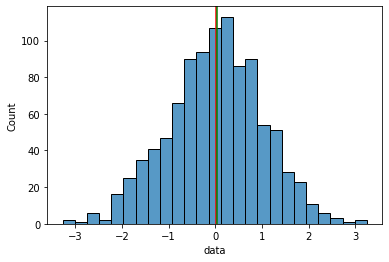

In [4]:
# We can also plot the data to see the distribution with the mean and median also shown.

sns.histplot(data['data'], kde=False)           # plot the data
plt.axvline(data['data'].mean(), color='r')     # plot the mean
plt.axvline(data['data'].median(), color='g')   # plot the median
plt.show()

Seaborn give us the ability to visualize the distribution of our data. We can see that the distribution is symmetric and the mean is almost the same as the median.

Another way to find our if our data are normally distributed is to use a Q-Q plot. A Q-Q plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. If the two distributions are the same, the resulting points should fall approximately on a straight line. If the distributions are different, the resulting plot will show some departure from the line.

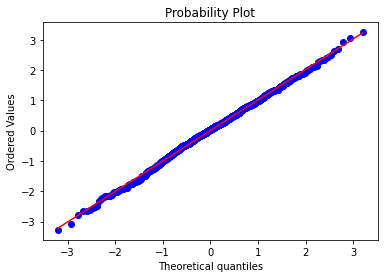

In [5]:
# Lets plot a QQ plot to check if the data is normally distributed

stats.probplot(data['data'], dist="norm", plot=plt)
plt.show()


With no doubt, our data are normally distributed.

## Check data with some noise

Now lets see how a non normal distribution looks like, when using the same tools as before. 

In [6]:
# Create a random dataset with noise

data = np.random.normal(0, 1, 1000)            # create a random normal distribution
data = data + np.random.exponential(1, 1000)   # add some exponential noise
data = pd.DataFrame(data, columns=['data'])    # convert to a dataframe
data.head()                                    # show the first 5 rows

,data
0,1.043682
1,2.679123
2,2.233100
3,3.093988
4,1.273115


In [7]:
# First the describe function

data.describe()

,data
count,1000.000000
mean,0.993042
std,1.444087
min,-3.038548
25%,0.012669
50%,0.851776
75%,1.820992
max,7.775405


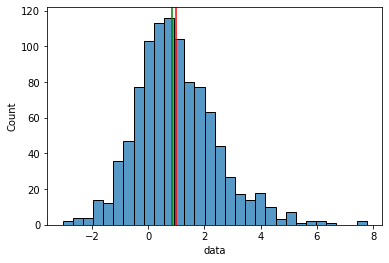

In [8]:
# Now the histogram

sns.histplot(data['data'], kde=False)           # plot the data
plt.axvline(data['data'].mean(), color='r')     # plot the mean
plt.axvline(data['data'].median(), color='g')   # plot the median
plt.show()

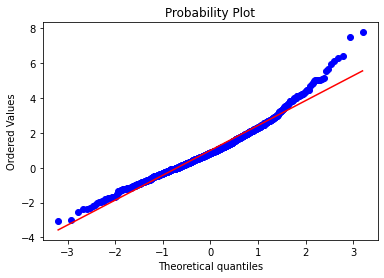

In [9]:
# Now the QQ plot

stats.probplot(data['data'], dist="norm", plot=plt)
plt.show()

By adding some noise to our data, we can see that the distribution is not normal anymore. The mean is not the same as the median and the Q-Q plot is not linear anymore.

## Test on real data

In [10]:
# Load the iris dataset

iris = sns.load_dataset('iris')     # load the iris dataset
iris.head()                         # show the first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


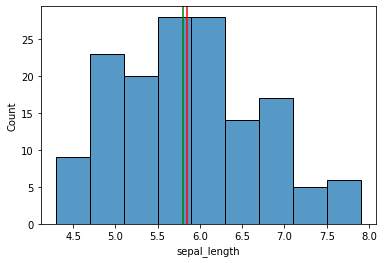

In [11]:
# Lets look at the distribution of the separ length

sns.histplot(iris['sepal_length'], kde=False)   # plot the data
plt.axvline(iris['sepal_length'].mean(), color='r')     # plot the mean
plt.axvline(iris['sepal_length'].median(), color='g')   # plot the median
plt.show()

The distribution of the data it looks like normal, but we can see that the mean is not the same as the median. This means that the data are skewed.

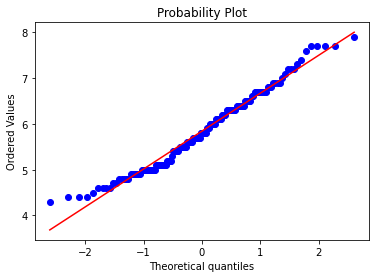

In [12]:
# Now the QQ plot

stats.probplot(iris['sepal_length'], dist="norm", plot=plt)
plt.show()

After seeing the QQ plot, we can say that the data follow a normal distribution but are not perfectly normal.